In [1]:
import numpy as np
import pandas as pd
import pymysql
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#資料載入
conn = pymysql.connect("localhost", "root", "admin", "genius_data", charset="utf8")
sql = "SELECT * FROM genius_data.all_data "
df = pd.read_sql(sql, conn)
df.head(10)

,Order Number,Department,Country,Customer Number,Customer Name,Customer email,Sales(當時),Sales(Now),Back office(Now),LargeCat,...,Date Promised,Date Actual Ship,ETD Date,Date Invoice,Date G/L,Choose Date,YM,Year,Month,出貨狀態
0,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Gaming,...,2019-03-15,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出
1,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,KB/K+M,...,2019-03-15,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出
2,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,KB/K+M,...,2019-03-15,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出
3,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Headset,...,2019-03-15,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出
4,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Headset,...,2019-03-15,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出
5,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Mouse,...,2019-03-15,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出
6,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Mouse,...,2019-03-15,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出
7,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Mouse,...,2019-03-15,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出
8,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Mouse,...,2019-03-15,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出
9,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Mouse,...,2019-03-15,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出


In [3]:
df[ (df['Year']==2020) & (df['Department']=='SF2') ].\
    groupby(by = ['LargeCat', 'MediumCat'], axis=0)['Revenue', 'Quantity'].sum().astype(int)

Revenue  Quantity
LargeCat MediumCat                            
Gaming   Gaming Headset       355198     27790
         Gaming KB            410400     42677
         Gaming Mouse         335485     49189
         Gaming Speaker       123606      3466
Headset  BT Headset            19963       900
         Headset             1429460    389482
         In-ear Headset       170717     35873
KB/K+M   Wired K+M           1319991    212340
         Wired KB            2842310    655573
         Wireless K+M        1425078    145793
Mouse    Wired Mouse         2979520   1328140
         Wireless Mouse      3787880    820936
Others   Mouse Pad            118433     28876
         Other                 63412      4740
         Pen                  632749     25700
Speaker  2.0 Speaker          297141     24530
         2.1 Speaker           68246      3844
         5.1Channel Speaker    11626       372
         BT Speaker            29669      1357
         USB Speaker         1182690    253960
Web Cam  Web Cam             1906210    174246

In [4]:
df['ASP'] = df['Revenue'] / df['Quantity']
df['ASP']

0          8.25
1          6.11
2          9.80
3          4.75
4          3.00
          ...  
689191     8.05
689192     8.25
689193    13.50
689194    11.80
689195     2.96
Name: ASP, Length: 689196, dtype: float64

In [5]:
df

,Order Number,Department,Country,Customer Number,Customer Name,Customer email,Sales(當時),Sales(Now),Back office(Now),LargeCat,...,Date Actual Ship,ETD Date,Date Invoice,Date G/L,Choose Date,YM,Year,Month,出貨狀態,ASP
0,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Gaming,...,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出,8.25
1,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,KB/K+M,...,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出,6.11
2,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,KB/K+M,...,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出,9.80
3,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Headset,...,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出,4.75
4,19100090.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Headset,...,2019-03-28,,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019,4,已出,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689191,20100533.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Gaming,...,NaT,2021/1/12,NaT,NaT,2021-01-12,2021-02-09,2021,2,未出,8.05
689192,20100533.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Gaming,...,NaT,2021/1/12,NaT,NaT,2021-01-12,2021-02-09,2021,2,未出,8.25
689193,20100533.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Gaming,...,NaT,2021/1/12,NaT,NaT,2021-01-12,2021-02-09,2021,2,未出,13.50
689194,20100533.0,SF2,Colombia,228152.0,MPS,MPS@geniusnet.com,吳玲彥,吳玲彥,周松嬰,Gaming,...,NaT,2021/1/12,NaT,NaT,2021-01-12,2021-02-09,2021,2,未出,11.80


In [14]:
df.shape

(689196, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689196 entries, 0 to 689195
Data columns (total 31 columns):
Order Number        689196 non-null float64
Department          689166 non-null object
Country             689166 non-null object
Customer Number     689166 non-null float64
Customer Name       689166 non-null object
Customer email      387988 non-null object
Sales(當時)           687855 non-null object
Sales(Now)          344141 non-null object
Back office(Now)    339058 non-null object
LargeCat            665186 non-null object
MediumCat           665186 non-null object
Sls Cd3             665181 non-null object
Sls CD3 Desc#       689196 non-null object
Sls Cd4             665186 non-null object
Sls CD4 Desc#       688701 non-null object
Product Desc#       689196 non-null object
2nd Item Number     689196 non-null object
Quantity            689196 non-null float64
Revenue             689196 non-null float64
Date Order          689196 non-null datetime64[ns]
Date Promised    

In [16]:
df.describe()

,Order Number,Customer Number,Quantity,Revenue,Year,Month,ASP
count,6.891960e+05,6.891660e+05,689196.000000,689196.000000,689196.000000,689196.000000,689196.000000
mean,1.297638e+07,1.255364e+05,329.368418,1581.615987,2012.979192,6.412209,6.978607
std,2.536176e+06,4.935307e+04,1202.730497,4238.240348,2.506227,3.423946,11.869349
min,9.002524e+06,1.050000e+02,-22275.000000,-77962.500000,2010.000000,1.000000,-47.299999
25%,1.110256e+07,1.003140e+05,5.000000,0.000000,2011.000000,3.000000,0.000000
50%,1.210439e+07,1.145160e+05,59.000000,426.000000,2012.000000,6.000000,3.800000
75%,1.410346e+07,1.580630e+05,200.000000,1468.500000,2014.000000,9.000000,7.570000
max,2.010053e+07,1.013207e+06,103280.000000,262480.000000,2021.000000,12.000000,195.000000


In [17]:
# 查看數據的變數、總數、缺失數據、變數measurement(維度)
def data_overview():
    print("Rows :  " , df.shape[0])
    print("Columns:  " , df.shape[1] )
    #isnull.sum()會對每條series做sum up ，所以我們還要取出value做一次sum up
    print('Missing Value number : ' , df.isnull().sum().values.sum()) 
    print('\nUnique values' , df.nunique())
data_overview()

Rows :   689196
Columns:   30
Missing Value number :  1102574

Unique values Order Number        16587
Department              6
Country                88
Customer Number       420
Customer Name         420
Customer email        110
Sales(當時)             100
Sales(Now)             10
Back office(Now)       11
LargeCat                7
MediumCat              28
Sls Cd3                80
Sls CD3 Desc#          81
Sls Cd4              1098
Sls CD4 Desc#        1099
Product Desc#        5909
2nd Item Number      5191
Quantity             3079
Revenue             44814
Date Order           2608
Date Promised        2999
Date Actual Ship     2637
ETD Date               44
Date Invoice         3324
Date G/L             3323
Choose Date          3360
YM                   3359
Year                   12
Month                  12
出貨狀態                    2
dtype: int64


In [9]:
df[ (df['Year']==2020) & (df['LargeCat']=='Mouse') ].\
    groupby(by = ['LargeCat', 'MediumCat'], axis=0)['Revenue', 'Quantity'].sum().astype(int)

Revenue  Quantity
LargeCat MediumCat                        
Mouse    Wired Mouse     5890282   2691440
         Wireless Mouse  9162338   2054556

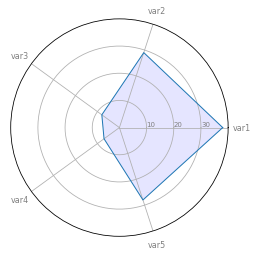

In [24]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# 生成新變數

In [26]:
# 生成新變數，搭配 apply() 與 lambda 函數將公式應用到每一個觀測值
# apply函數會自動遍歷每一行DataFrame的數據，最後將所有結果組合成一個Series數據結構並返回。
df['Country_abb'] = df['Country'].apply(lambda y: y[3:5])
df.head(10)

,Order Number,Department,Continent,Country,Ship To Number,Ship_To AlphaName,Customer Number,Customer Name,LargeCat,MediumCat,...,Exchange Rate,Foreign Unit Price,Revenue,Foreign Extended Cost,Foreign Ext# Margin,Quantity,Description,Date Invoice,Date G/L,Country_abb
0,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Mouse,Wireless Mouse,...,30.765,4.9,490.0,366.20,123.80,100.0,OBM,2019-04-07,2019-04-07,te
1,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Mouse,Wireless Mouse,...,30.765,4.9,490.0,366.31,123.69,100.0,OBM,2019-04-07,2019-04-07,te
2,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Mouse,Wireless Mouse,...,30.765,4.9,490.0,366.18,123.82,100.0,OBM,2019-04-07,2019-04-07,te
3,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Mouse,Wireless Mouse,...,30.765,3.9,19500.0,14171.00,5329.00,5000.0,OBM,2019-04-07,2019-04-07,te
4,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Headset,Headset,...,30.765,2.1,2100.0,1470.00,630.00,1000.0,OBM,2019-04-07,2019-04-07,te
5,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Headset,Headset,...,30.765,15.5,1550.0,647.59,902.41,100.0,OBM,2019-04-07,2019-04-07,te
6,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Headset,Headset,...,30.765,15.5,1550.0,647.59,902.41,100.0,OBM,2019-04-07,2019-04-07,te
7,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Speaker,2.0 Speaker,...,30.765,4.3,6020.0,3839.08,2180.92,1400.0,OBM,2019-04-07,2019-04-07,te
8,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Speaker,2.0 Speaker,...,30.765,4.3,1720.0,1101.32,618.68,400.0,OBM,2019-04-07,2019-04-07,te
9,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Speaker,2.0 Speaker,...,30.765,4.0,2400.0,1759.02,640.98,600.0,OBM,2019-04-07,2019-04-07,te


In [27]:
# 生成新變數，搭配 apply() 與 lambda 函數將公式應用到每一個觀測值
# apply函數會自動遍歷每一行DataFrame的數據，最後將所有結果組合成一個Series數據結構並返回。
df['Revenue_TWD'] = df['Revenue'].apply(lambda y: y*30.1759256)
df.head(10)

,Order Number,Department,Continent,Country,Ship To Number,Ship_To AlphaName,Customer Number,Customer Name,LargeCat,MediumCat,...,Foreign Unit Price,Revenue,Foreign Extended Cost,Foreign Ext# Margin,Quantity,Description,Date Invoice,Date G/L,Country_abb,Revenue_TWD
0,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Mouse,Wireless Mouse,...,4.9,490.0,366.20,123.80,100.0,OBM,2019-04-07,2019-04-07,te,14786.203544
1,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Mouse,Wireless Mouse,...,4.9,490.0,366.31,123.69,100.0,OBM,2019-04-07,2019-04-07,te,14786.203544
2,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Mouse,Wireless Mouse,...,4.9,490.0,366.18,123.82,100.0,OBM,2019-04-07,2019-04-07,te,14786.203544
3,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Mouse,Wireless Mouse,...,3.9,19500.0,14171.00,5329.00,5000.0,OBM,2019-04-07,2019-04-07,te,588430.549200
4,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Headset,Headset,...,2.1,2100.0,1470.00,630.00,1000.0,OBM,2019-04-07,2019-04-07,te,63369.443760
5,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Headset,Headset,...,15.5,1550.0,647.59,902.41,100.0,OBM,2019-04-07,2019-04-07,te,46772.684680
6,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Headset,Headset,...,15.5,1550.0,647.59,902.41,100.0,OBM,2019-04-07,2019-04-07,te,46772.684680
7,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Speaker,2.0 Speaker,...,4.3,6020.0,3839.08,2180.92,1400.0,OBM,2019-04-07,2019-04-07,te,181659.072112
8,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Speaker,2.0 Speaker,...,4.3,1720.0,1101.32,618.68,400.0,OBM,2019-04-07,2019-04-07,te,51902.592032
9,19100043,SF5,非洲&中東,United Arab Emirates (UAE),100337,GENIUS COMPUTER TECHNOLOGY LTD,100337.0,gct,Speaker,2.0 Speaker,...,4.0,2400.0,1759.02,640.98,600.0,OBM,2019-04-07,2019-04-07,te,72422.221440


In [ ]:
# 計算

In [31]:
# 聚合函數針對欄位計算
df[  (df['Year']==2020) & (df['Country']=='United Arab Emirates (UAE)')  ]  [['Revenue_TWD']].sum().astype('int')

Revenue_TWD    19733052
dtype: int32

In [34]:
df[  (df['Year']==2020) & (df['Country']=='Russia')  ]  [['Quantity', 'Revenue', 'Revenue_TWD']].mean()

Quantity          840.210210
Revenue          3827.834024
Revenue_TWD    115508.434718
dtype: float64

# group

In [35]:
# groupby方法，順序是：WHERE.groupby[SELECT].聚合函數
df[ (df['Year']==2020) ].groupby(by = ['Department','Country'])[['Quantity', 'Revenue']].sum().astype(int)

Quantity  Revenue
Department Country                                          
SF1        Azerbaijan                         11670    52287
           Georgia                            47592   198737
           Kazakhstan                           460     7564
           Moldova, Republic of               18596    79988
           Russia                            279790  1274668
           Ukrainian SSR                      87800   338144
SF2        Argentina                         651219  2840498
           Bolivia                            43264   234896
           Chile                             196292  1004028
           Colombia                          317944  1569371
           Costa Rica                         13708    60640
           Ecuador                           203723   791263
           Peru                              172303   806501
           Uruguay                            22198   110253
SF3        Bosnia and Herzegowina              8492    45895
           Croatia (local name Hrvatska)      26032   150170
           Czech Republic                    349036  2157050
           France                             17996   118870
           Hungary                           208055  1053215
           Macedonia, the former Yugoslav     12057    69388
           Portugal                           15860    73496
           Romania                            21954   148639
           Serbia                            108583   605629
           Slovenia                           10116    56433
           Spain                              58370   299129
           United Kingdom                     36382   223291
SF4        Australia                           4957    39984
           Indonesia                          86010   276739
           Malaysia                            5400    43650
           New Zealand                         7470    62176
           Philippines                       110934   473438
           Thailand                           49451   319394
           Vietnam                           264311   982804
SF5        Iran                              144500   620607
           Israel                             43840   212755
           South Africa                       64720   329675
           United Arab Emirates (UAE)        177084   653933

In [10]:
#也可以直接用pivot_table
df[ (df['LargeCat']=='Web Cam') ].pivot_table(    #前面可以加篩選(excel樞紐的左上)
               columns = ['LargeCat', 'Year'],   #欄變數(excel樞紐的右上)
               index = ['Department','Country'],  #列變數(excel樞紐的左下)
               values = ['Revenue'],
               aggfunc=np.sum,
               margins=True,  #欄外(margin)添加所有行/列小計/總計
               margins_name='Total',     #更改總計欄位名稱(預設為All，當margins=True時才會顯示)
               fill_value=0,  #用"某值"填滿遺漏值
               dropna=True    #丟棄NA值
                ).sort_index(    axis=1, ascending=False )

Revenue                               \
LargeCat                              Web Cam                                
Year                                     2021          2020           2019   
Department Country                                                           
SF1        Armenia                          0  6.400000e+03    3312.000031   
           Azerbaijan                       0  0.000000e+00       0.000000   
           Georgia                          0  1.966000e+04    4731.599976   
           Kazakhstan                       0  2.326078e+05    8282.000000   
           Kyrgyzstan                       0  0.000000e+00       0.000000   
...                                       ...           ...            ...   
SF5        United Arab Emirates (UAE)       0  1.221480e+05    3856.000000   
           Zimbabwe                         0  0.000000e+00       0.000000   
SF6        Hong Kong                        0  0.000000e+00     850.000000   
           Taiwan                           0  0.000000e+00       0.000000   
Total                                   37740  5.514019e+06  999807.399994   

                                                                    \
LargeCat                                                             
Year                                           2018           2017   
Department Country                                                   
SF1        Armenia                     4.801500e+03    6602.000000   
           Azerbaijan                  9.956000e+02     380.000000   
           Georgia                     5.916000e+03    3366.000000   
           Kazakhstan                  0.000000e+00       0.000000   
           Kyrgyzstan                  0.000000e+00       0.000000   
...                                             ...            ...   
SF5        United Arab Emirates (UAE)  1.700000e+03       0.000000   
           Zimbabwe                    0.000000e+00       0.000000   
SF6        Hong Kong                   1.347200e+03       0.000000   
           Taiwan                      0.000000e+00       0.000000   
Total                                  1.055924e+06  831871.409729   

                                                                    \
LargeCat                                                             
Year                                            2016          2015   
Department Country                                                   
SF1        Armenia                       6978.399902  1.623920e+04   
           Azerbaijan                       0.000000  0.000000e+00   
           Georgia                      11323.500000  1.034550e+04   
           Kazakhstan                    6733.700195  3.185390e+04   
           Kyrgyzstan                    8549.600098  1.287000e+03   
...                                              ...           ...   
SF5        United Arab Emirates (UAE)       0.000000  4.059000e+03   
           Zimbabwe                         0.000000  0.000000e+00   
SF6        Hong Kong                      998.400024  2.477100e+03   
           Taiwan                          13.200000  3.558740e+03   
Total                                  853427.239608  1.650273e+06   

                                                                   \
LargeCat                                                            
Year                                           2014          2013   
Department Country                                                  
SF1        Armenia                     2.139720e+04  7.697300e+04   
           Azerbaijan                  4.782000e+03  1.805100e+04   
           Georgia                     4.210680e+04  4.838130e+04   
           Kazakhstan                  4.205559e+04  1.775084e+05   
           Kyrgyzstan                  1.105130e+04  6.136330e+04   
...                                             ...           ...   
SF5        United Arab Emirates (UAE)  1.685550e+04  2.706660e+04   
      

In [ ]:
## pivot_table排序參數
sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', 
           na_position='last', sort_remaining=True, by=None)
## pivot_table參數說​​明
axis：0按照行名排序；1按照列名排序
level：默認None，否則按照給定的level順序排列---貌似並不是，文檔
ascending：默認True升序排列；False降序排列
inplace：默認False，否則排序之後的數據直接替換原來的數據框
kind：默認quicksort，排序的方法
na_position：缺失值默認排在最後{"first","last"}
by：按照那一列數據進行排序，但是by參數貌似不建議使用

# 數值格式設定

In [46]:
df['Quantity'].astype('int32', copy=True) #整數

0         100
1         100
2         100
3        5000
4        1000
         ... 
73282    2000
73283    1200
73284     520
73285    1200
73286     520
Name: Quantity, Length: 73287, dtype: int32

In [47]:
df['Quantity'].map(lambda x:('%.1f')%x) #小數位數，四捨五入

0         100.0
1         100.0
2         100.0
3        5000.0
4        1000.0
          ...  
73282    2000.0
73283    1200.0
73284     520.0
73285    1200.0
73286     520.0
Name: Quantity, Length: 73287, dtype: object

In [48]:
df['Revenue'].map(lambda x:format(x,','))  #千位分隔符(1)

0           490.0
1           490.0
2           490.0
3        19,500.0
4         2,100.0
           ...   
73282    16,000.0
73283    22,188.0
73284     9,874.8
73285    20,988.0
73286     9,094.8
Name: Revenue, Length: 73287, dtype: object

In [49]:
df['Revenue'].apply("{:,}".format)  #千位分隔符(2)

0           490.0
1           490.0
2           490.0
3        19,500.0
4         2,100.0
           ...   
73282    16,000.0
73283    22,188.0
73284     9,874.8
73285    20,988.0
73286     9,094.8
Name: Revenue, Length: 73287, dtype: object

In [31]:
#整數&千分位
df['Quantity'].astype(int).map(lambda x:format(x,','))
#df['Quantity'].astype(int).apply("{:,}".format)
#但type還是object，所以不能用來計算和做圖

0          100
1          100
2          100
3        5,000
4        1,000
         ...  
71246      240
71247      160
71248    1,000
71249      300
71250      200
Name: Quantity, Length: 71251, dtype: object

In [50]:
df.pivot_table(index = 'Year', values = 'Revenue', aggfunc=np.sum)

,Revenue
Year,
2017,57237095.86
2018,45827336.22
2019,31888717.16
2020,18385215.77


# Matplotlib

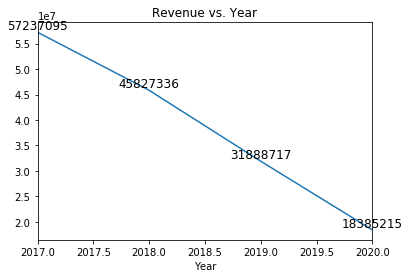

In [91]:
#折線圖
import matplotlib.pyplot as plt

df_RY = df[['Year', 'Revenue']].groupby(by = 'Year')['Revenue'].sum()

df_RY.plot(kind = 'line', x = 'Year', y = 'Revenue', title = 'Revenue vs. Year', legend = False)

#加入點標籤
y = df_RY.astype(int)
x = [2017, 2018, 2019, 2020]
for a,b in zip(x,y):
    plt.text(a, b, b, ha='center', va= 'bottom', fontsize=12)

plt.show()

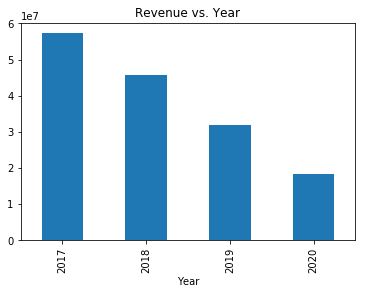

In [79]:
#條圖
bar = df_RY.plot(kind = 'bar', x = 'Year', y = 'Revenue', title = 'Revenue vs. Year', legend = False)
bar

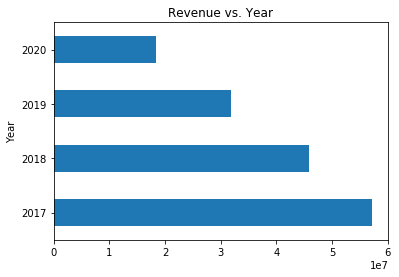

In [80]:
barh = df_RY.plot(kind = 'barh', x = 'Year', y = 'Revenue', title = 'Revenue vs. Year', legend = False)
barh

In [ ]:
#Pandas也有內建作圖功能

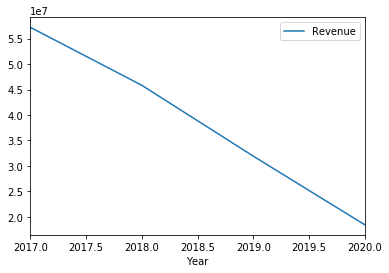

In [81]:
df.pivot_table(index = 'Year', values = 'Revenue', aggfunc=np.sum ).plot.line()

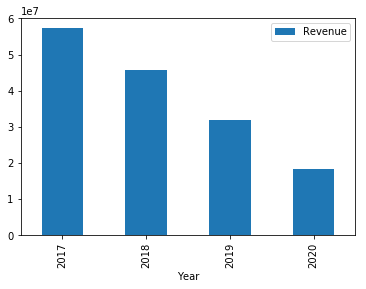

In [82]:
df.pivot_table(index = 'Year', values = 'Revenue', aggfunc=np.sum ).plot.bar()

In [44]:
df_RY.astype(int)

Year
2017    57237096
2018    45827336
2019    31888717
2020    11882147
Name: Revenue, dtype: int32

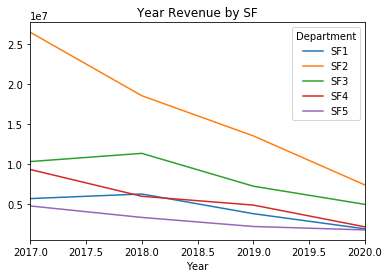

In [63]:
#折線圖
#將SF1~SF5資料篩選出來並繪製每年的平均業績變化(使用 pivot_table)：
import matplotlib.pyplot as plt

df_SF = df.loc[df['Department'].isin(['SF1', 'SF2', 'SF3', 'SF4', 'SF5'])]  
#loc使用標籤訪問值組
#isin()接受一个列表，判断该列中元素是否在列表中。
df_SF_pivot = df_SF.pivot_table(values = 'Revenue', columns = 'Department', index = 'Year', aggfunc=np.sum)
df_SF_pivot.plot(title = 'Year Revenue by SF')
plt.show()

In [62]:
dsp = df_SF_pivot
dsp

Department,SF1,SF2,SF3,SF4,SF5
Year,,,,,
2017,5723109.06,26470102.54,10339896.68,9355135.11,4805347.76
2018,6297863.54,18554561.00,11366678.78,6011498.54,3374284.26
2019,3839514.18,13539243.30,7268885.66,4912928.51,2244281.70
2020,1951390.59,7417454.00,5001211.12,2198187.42,1816972.64


In [64]:
dsp['Col_sum'] = dsp.apply(lambda x: x.sum(), axis=1)
dsp['Col_sum']

Year
2017    56693591.15
2018    45604886.12
2019    31804853.35
2020    18385215.77
Name: Col_sum, dtype: float64

In [65]:
dsp['Col_sum_2']=dsp['SF1']+dsp['SF2']+dsp['SF3']+dsp['SF4']+dsp['SF5']
dsp

Department,SF1,SF2,SF3,SF4,SF5,Col_sum,Col_sum_2
Year,,,,,,,
2017,5723109.06,26470102.54,10339896.68,9355135.11,4805347.76,56693591.15,56693591.15
2018,6297863.54,18554561.00,11366678.78,6011498.54,3374284.26,45604886.12,45604886.12
2019,3839514.18,13539243.30,7268885.66,4912928.51,2244281.70,31804853.35,31804853.35
2020,1951390.59,7417454.00,5001211.12,2198187.42,1816972.64,18385215.77,18385215.77


In [66]:
dsp.loc['Row_sum'] = dsp.apply(lambda x: x.sum())
dsp.loc['Row_sum']

Department
SF1          1.781188e+07
SF2          6.598136e+07
SF3          3.397667e+07
SF4          2.247775e+07
SF5          1.224089e+07
Col_sum      1.524885e+08
Col_sum_2    1.524885e+08
Name: Row_sum, dtype: float64

In [67]:
dsp

Department,SF1,SF2,SF3,SF4,SF5,Col_sum,Col_sum_2
Year,,,,,,,
2017,5723109.06,26470102.54,10339896.68,9355135.11,4805347.76,5.669359e+07,5.669359e+07
2018,6297863.54,18554561.00,11366678.78,6011498.54,3374284.26,4.560489e+07,4.560489e+07
2019,3839514.18,13539243.30,7268885.66,4912928.51,2244281.70,3.180485e+07,3.180485e+07
2020,1951390.59,7417454.00,5001211.12,2198187.42,1816972.64,1.838522e+07,1.838522e+07
Row_sum,17811877.37,65981360.84,33976672.24,22477749.58,12240886.36,1.524885e+08,1.524885e+08


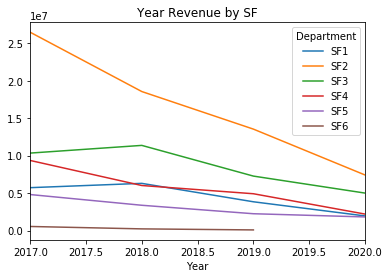

In [68]:
#折線圖(上例的第一行也可以省略)
#將SF1~SF5資料篩選出來並繪製每年的平均業績變化(使用 pivot_table)：

df_SF_pivot2 = df.pivot_table(values = 'Revenue', columns = 'Department', index = 'Year', aggfunc=np.sum)
df_SF_pivot2.plot(title = 'Year Revenue by SF')
plt.show()

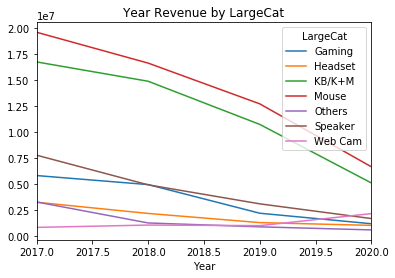

In [70]:
#折線圖

import matplotlib.pyplot as plt

df_SF_pivot2 = df.pivot_table(values = 'Revenue', columns = 'LargeCat', index = 'Year', aggfunc=np.sum)
df_SF_pivot2.plot(title = 'Year Revenue by LargeCat')
plt.show()

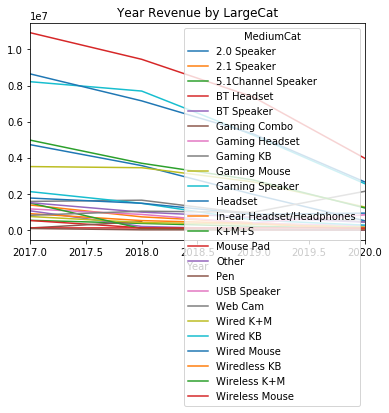

In [71]:
#折線圖

import matplotlib.pyplot as plt

df_SF_pivot2 = df.pivot_table(values = 'Revenue', columns = 'MediumCat', index = 'Year', aggfunc=np.sum)
df_SF_pivot2.plot(title = 'Year Revenue by LargeCat')
plt.show()

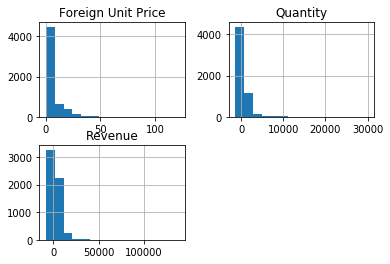

In [74]:
#直方圖(橫軸是代入的值，縱軸是次數)
#將 2019 年資料篩選出來並以三個子圖（subplots）繪製銷量、銷額與單價的直方圖：

df_2020 = df[df['Year'] == 2020]
df_2020[['Quantity','Revenue', 'Foreign Unit Price']].hist(bins = 15)
plt.show()

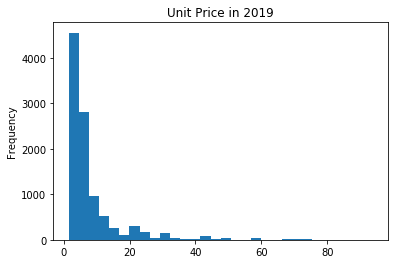

In [128]:
#單價的直方圖：
df_2019[['Foreign Unit Price']].plot(kind = 'hist', title = 'Unit Price in 2019', legend = False, bins = 30)
plt.show()

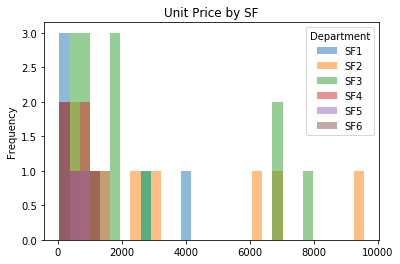

In [140]:
#將單價直方圖依照不同部門以不同顏色繪製：
df_UP_SF_pivot = df_2019.pivot_table(values = 'Foreign Unit Price', columns = 'Department', index = 'Country', aggfunc=np.sum)
df_UP_SF_pivot.plot(kind = 'hist', alpha=0.5, bins = 30, title = 'Unit Price by SF')
plt.show()

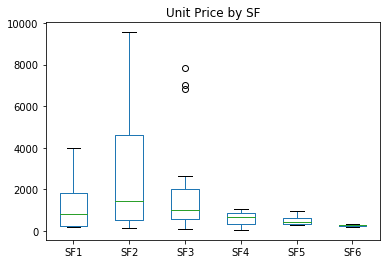

In [141]:
#以盒鬚圖繪製：
df_UP_SF_pivot.plot(kind = 'box', title = 'Unit Price by SF')
plt.show()

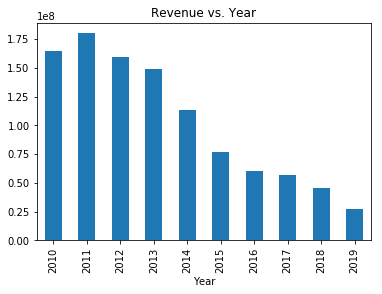

In [161]:
#長條圖

df_RY = df[['Year', 'Foreign Extended Price']].groupby(by = 'Year')['Foreign Extended Price'].sum()
df_RY.plot(kind = 'bar', x = 'Year', y = 'Foreign Extended Price', title = 'Revenue vs. Year', legend = False)

    
plt.show()

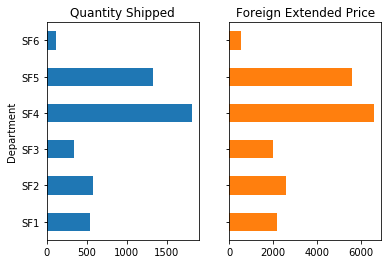

In [12]:
#長條圖2：
import matplotlib.pyplot as plt

df_x = df[df['Year'] == 2019].groupby(by = 'Department')[['Quantity Shipped', 'Foreign Extended Price']].mean()
df_x.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False) 
#sharex = False：不共享x軸，表示x軸單位獨立
#sharey = True：共享y軸，只會列出一次y軸單位
plt.show()

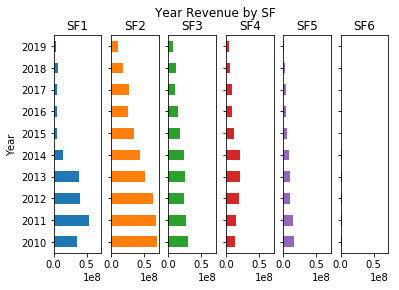

In [77]:
import matplotlib.pyplot as plt

df_SF_pivot3 = df.pivot_table(values = 'Foreign Extended Price', columns = 'Department', index = 'Year', aggfunc=np.sum)
df_SF_pivot3.plot(kind = 'barh', subplots = True, layout = (1, 6), sharex = True, sharey = True, legend = False, title = 'Year Revenue by SF')
plt.show()

# Seaborm

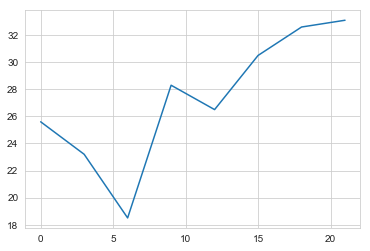

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

x = range(0, 22, 3)
sinus = [25.6, 23.2, 18.5, 28.3, 26.5, 30.5, 32.6, 33.1]

sns.set_style("whitegrid")  #白格
sns.lineplot(x=x, y=sinus)
plt.show()

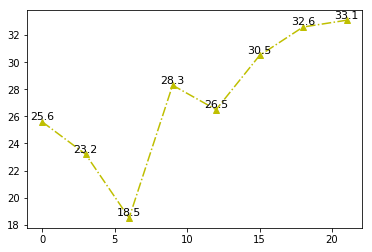

In [20]:
import matplotlib.pyplot as plt

days = range(0, 22, 3)
celsius = [25.6, 23.2, 18.5, 28.3, 26.5, 30.5, 32.6, 33.1]

for a,b in zip(days,celsius):
    plt.text(a, b, b, ha='center', va= 'bottom',fontsize=11) 
#zip()函數用於將可迭代的對像作為參數，將對像中對應的元素打包成一個個元組，然後返回由這些元組組成的列表。

plt.plot(days, celsius, '^-.y')  #^:三角形，'-.':線樣式，y:黃色
plt.show()

In [10]:
df[  (df['Year']==2019) ].groupby(by = 'Month')[['Quantity Shipped', 'Foreign Extended Price']].sum()

,Quantity Shipped,Foreign Extended Price
Month,,
1,690251.0,2957915.58
2,423143.0,2005195.00
3,602034.0,2747285.83
4,612043.0,2702995.40
5,582949.0,2586987.76
6,473530.0,2163726.94
7,530259.0,2355121.84
8,683384.0,3046237.69
9,731257.0,3516879.81


### 繪製雙Y軸圖

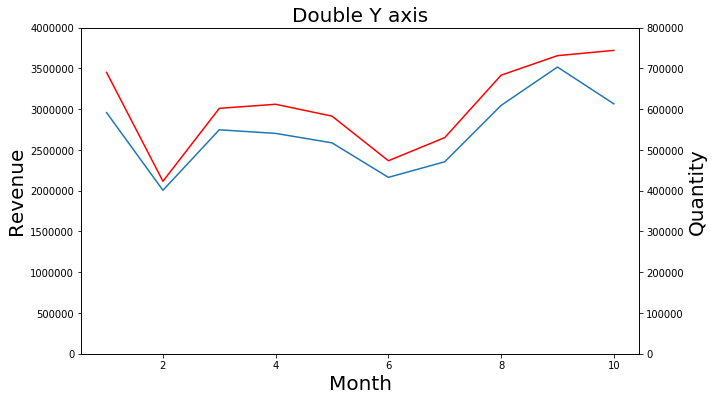

In [8]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10]
y1 = df[df['Year'] == 2019].groupby(by = 'Month')[['Foreign Extended Price']].sum()
y2 = df[df['Year'] == 2019].groupby(by = 'Month')[['Quantity Shipped']].sum()

fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylim([0, 4000000])
ax1.set_ylabel('Revenue', fontsize=20)
ax1.set_title("Double Y axis", fontsize=20)
ax1.set_xlabel('Month', fontsize=20)

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'r')
ax2.set_ylim([0, 800000])
ax2.set_ylabel('Quantity' , fontsize=20)

plt.show()